###  Data Analysis And Visulization On Covid-19
### India Versus And Countries

### Importing Various Libraries

In [51]:
import numpy as np
##### For creating MultiDimensional Arrays
import matplotlib.pyplot as plt
%matplotlib inline
# It's a Visualization Library for making 2D plots on arrays mainly work on numpy
import pandas as pd
#For providing high-performance, easy-to-use data structures and data analysis tools
#PandasDataframe is the most needed data frame in this project   
from matplotlib import style
#importing Special Function Style 
import plotly as py
# It is An charting module Interactive graph 
import plotly.express as pz
import plotly.graph_objects as gb
# So that we can use ploty as object oriented way
import plotly.offline as pyoo
# To Use plotly in offline Mode so that ahve set up connnection with jupyter notebook
from plotly.offline import init_notebook_mode,plot,iplot
import cufflinks as cf
#It connects Plotly with pandas to create various graphs and charts of data frames directly. 
#It is use to build interactive graphs 
import folium as fl
from datetime import date
plt.rcParams['figure.figsize']=10,8

#### connecting plotly in offline Mode

In [2]:
pyoo.init_notebook_mode(connected=True)
cf.go_offline()

### DataSet 
The dataset used in this project related to the Covid-19 is downloaded from kaggle
https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset.
It is a csv file which reading uisng PandasDataFrame .
PadasDataframe is basicalaly 2 Dimensional datastructure i.e it gives data a tabular form in rows & colummns
It consist of three components:-
1.Data
2.Rows
3.coulumms

In [154]:
df=pd.read_csv("https://api.covid19india.org/csv/latest/state_wise.csv")
df

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes
0,Total,338639,173707,9698,155191,15/06/2020 21:44:46,43,TT,5627,4024,178,NaN
1,Maharashtra,107958,50978,3950,53017,14/06/2020 21:54:47,13,MH,0,0,0,13 cases were marked as non-covid deaths in MH...
2,Tamil Nadu,46504,25344,479,20681,15/06/2020 20:04:47,0,TN,1843,797,44,2 deaths cross notified to other states from C...
3,Delhi,42829,16427,1400,25002,15/06/2020 21:24:48,0,DL,1647,604,73,"Delhi bulletins in the morning, containing dat..."
4,Gujarat,24101,16672,1506,5923,15/06/2020 21:44:47,0,GJ,511,339,28,NaN
5,Uttar Pradesh,13615,8268,399,4948,14/06/2020 22:08:48,0,UP,0,0,0,NaN
6,Rajasthan,12772,9631,294,2847,15/06/2020 10:59:48,0,RJ,78,65,2,NaN
7,Madhya Pradesh,10935,7903,465,2567,15/06/2020 20:38:47,0,MP,133,226,6,NaN
8,West Bengal,11494,5494,485,5515,15/06/2020 20:33:49,0,WB,407,434,10,NaN
9,State Unassigned,6972,0,0,6972,15/06/2020 09:51:47,0,UN,-464,0,0,MoHFW website reports that these are the 'case...


Upon reading the data set we can see that data we see we have som unnessary data which we remove from our dataset
which is know as 
##### Cleaning of Dataset

In [155]:
Clean_data=df.drop(['Last_Updated_Time','State_Notes','Delta_Confirmed','Delta_Recovered','Delta_Deaths'],axis =1)
Clean_data

,State,Confirmed,Recovered,Deaths,Active,Migrated_Other,State_code
0,Total,338639,173707,9698,155191,43,TT
1,Maharashtra,107958,50978,3950,53017,13,MH
2,Tamil Nadu,46504,25344,479,20681,0,TN
3,Delhi,42829,16427,1400,25002,0,DL
4,Gujarat,24101,16672,1506,5923,0,GJ
5,Uttar Pradesh,13615,8268,399,4948,0,UP
6,Rajasthan,12772,9631,294,2847,0,RJ
7,Madhya Pradesh,10935,7903,465,2567,0,MP
8,West Bengal,11494,5494,485,5515,0,WB
9,State Unassigned,6972,0,0,6972,0,UN


#### After Cleaning DataSet we can See that we get more understandle DataSet now we can use this for visualization and further Analysis.

In [156]:
print('Total number of Confirmed cases in India till now ')
Clean_data.iat[0,1]

Total number of Confirmed cases in India till now 


338639

In [6]:
Clean_data.shape

(38, 7)

We can see that there are total 38 states that are effected by the virus.

### Lets Do Some Visulization 

In [7]:
Clean_dta=Clean_data[Clean_data.State != 'Total']


In [157]:
Clean_dta.style.background_gradient(cmap='Reds')


,State,Confirmed,Recovered,Deaths,Active,Migrated_Other,State_code
1,Maharashtra,107958,50978,3950,53017,13,MH
2,Tamil Nadu,44661,24547,435,19679,0,TN
3,Delhi,41182,15823,1327,24032,0,DL
4,Gujarat,23590,16333,1478,5779,0,GJ
5,Uttar Pradesh,13615,8268,399,4948,0,UP
6,Rajasthan,12694,9566,292,2836,0,RJ
7,Madhya Pradesh,10802,7677,459,2666,0,MP
8,West Bengal,11087,5060,475,5552,0,WB
9,State Unassigned,6972,0,0,6972,0,UN
10,Karnataka,7000,3960,87,2951,2,KA


Now using function of style i.e cmap We can easily underestand as the darker the colour the most affected state &
vice versa.

### Deaths Heat Map Of India 

In [9]:
Deaths=Clean_dta.groupby('State')['Deaths'].sum().sort_values(ascending=False).to_frame()
Deaths.style.background_gradient(cmap='Reds')

,Deaths
State,
Maharashtra,3950
Gujarat,1478
Delhi,1327
West Bengal,475
Madhya Pradesh,459
Tamil Nadu,435
Uttar Pradesh,399
Rajasthan,292
Telangana,185


###### Now the Visualization we easily get to know in which state highest no.of deaths till Now.without any hussel. 

### Visulization Through Graph

##### Ploting Bar Graph Using Pandas Visualization

##### Line  plot using Pandas Library 


In [10]:
Confirm=Clean_dta.groupby('State')['Confirmed'].sum()

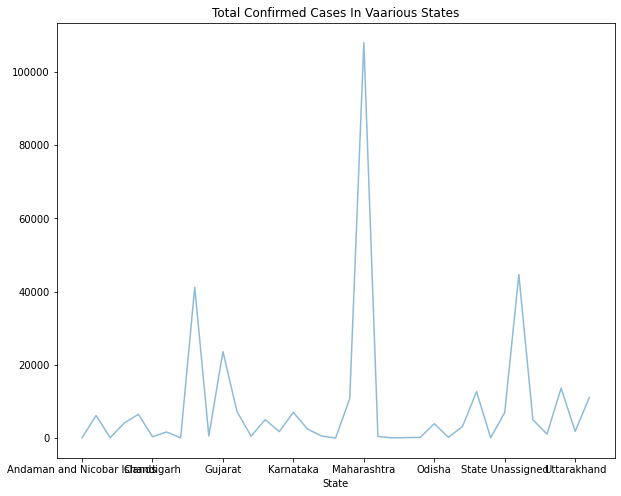

In [227]:
Confirm.plot(kind='line',x='State',y='Confirmed',title="Total Confirmed Cases In Vaarious States", alpha=0.5)

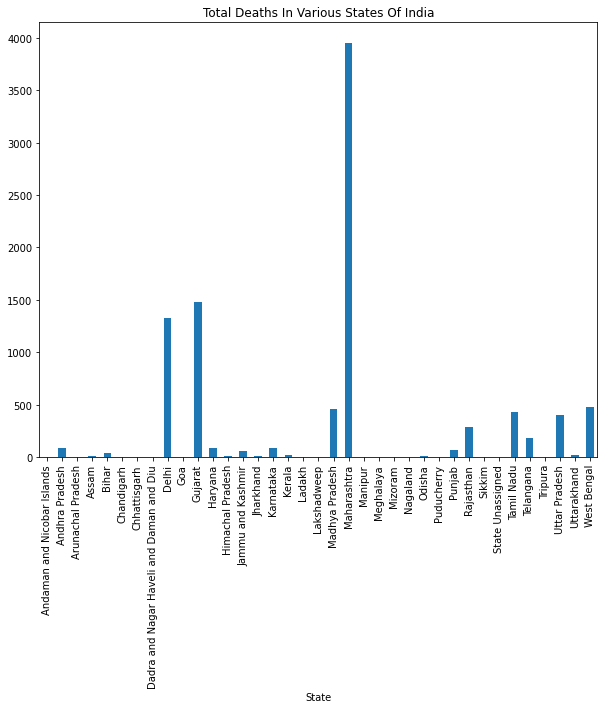

In [230]:
Confirm=Clean_dta.groupby('State')['Deaths'].sum()
Confirm.plot(kind='bar',x='State',y='Confirmed',title='Total Deaths In Various States Of India')

### Visualization through Plotly

In [236]:
#Plotly
#Confirm
Confirm.iplot(kind='bar',yaxis_title="Nuber of Deaths",xaxis_title="States",)

#### Visualization Plotly Express

In [238]:
Confirm1=Clean_dta.groupby('State')['Confirmed'].sum()

In [242]:
pz.bar(Confirm1)

#### Visulization through Matplotlib

<BarContainer object of 37 artists>

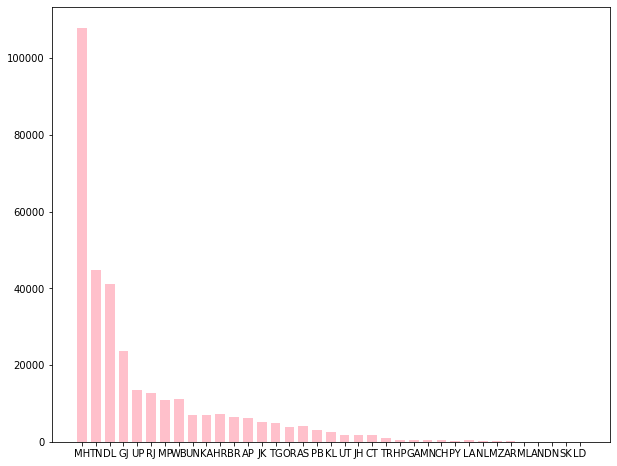

In [198]:
plt.bar(Clean_dta['State_code'],Clean_dta['Confirmed'], color ='Pink',  
        width = 0.7) 

### Time Series Analysis 

In [200]:
time_series=pd.read_csv('https://api.covid19india.org/csv/latest/case_time_series.csv')
time_series

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30 January,1,1,0,0,0,0
1,31 January,0,1,0,0,0,0
2,01 February,0,1,0,0,0,0
3,02 February,1,2,0,0,0,0
4,03 February,1,3,0,0,0,0
...,...,...,...,...,...,...,...
132,10 June,11156,287158,6275,140928,358,8107
133,11 June,11135,298293,6044,146972,394,8501
134,12 June,11306,309599,7263,154235,388,8889
135,13 June,12039,321638,8092,162327,309,9198


In [201]:
Y = time_series.iloc[110:,1].values #Stores Daily Confirmed
R = time_series.iloc[61:,3].values #Stores Daily Recovered
D = time_series.iloc[61:,5].values #Stores Daily Deceased
X = time_series.iloc[110:,0] #Stores Date

Text(0.5, 1.0, 'COVID-19 IN : Daily Confrimed\n')

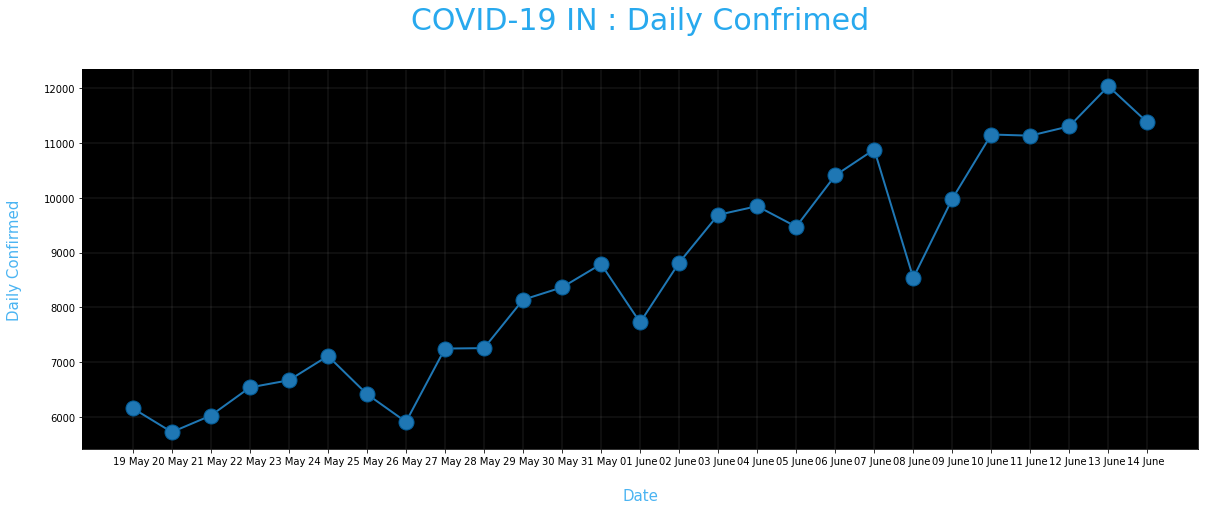

In [202]:
plt.figure(figsize=(20,7))
ax = plt.axes() 
ax.grid(linewidth=0.2, color='#8f8f8f')  
  
ax.set_facecolor("black")  
ax.set_xlabel('\nDate',size=15,color='#4bb4f2') 
ax.set_ylabel('Daily Confirmed\n', 
              size=15,color='#4bb4f2') 
  
ax.plot(X,Y, 
        color='#1F77B4', 
        marker='o', 
        linewidth=2, 
        markersize=15, 
        markeredgecolor='#035E9B')
plt.title("COVID-19 IN : Daily Confrimed\n",
          size=30,color='#28a9ee')


In [204]:
Y1 = time_series.iloc[0:,1].values
X1= time_series.iloc[0:,0]
fig = pz.line(time_series,X1,Y1, title='Time Series with Rangeslider')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

### Visualization on Indian Map

In [257]:
india_cord=pd.read_csv('/home/ajax/Desktop/Coordinates.csv')
#final.rename(columns={'location':'Country'},inplace=True)
india_cord.rename(columns={'Name of State / UT':'State'},inplace =True)

In [258]:
df_full=pd.merge(india_cord,Clean_dta,on='State')
df_full

,State,Lat,Long,Confirmed,Recovered,Deaths,Active,Migrated_Other,State_code
0,Andhra Pradesh,14.750429,78.570026,6152,3316,84,2752,0,AP
1,Delhi,28.669993,77.230004,41182,15823,1327,24032,0,DL
2,Haryana,28.450006,77.019991,7208,3003,88,4117,0,HR
3,Karnataka,12.570381,76.919997,7000,3960,87,2951,2,KA
4,Kerala,8.900373,76.569993,2462,1101,20,1340,1,KL
5,Maharashtra,19.250232,73.160175,107958,50978,3950,53017,13,MH
6,Punjab,31.519974,75.980003,3140,2356,67,717,0,PB
7,Rajasthan,26.449999,74.639981,12694,9566,292,2836,0,RJ
8,Tamil Nadu,12.920386,79.150042,44661,24547,435,19679,0,TN
9,Uttar Pradesh,27.599981,78.050006,13615,8268,399,4948,0,UP


## Now Let's Do The Analysis & Visualization  on World Data-Set 

In [214]:
world=pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
world.drop(['median_age','population_density','population','population','stringency_index','tests_units','tests_units','new_tests_smoothed_per_thousand','new_tests_smoothed_per_thousand','new_tests_smoothed','new_tests_per_thousand','total_tests_per_thousand','new_tests','total_tests','new_deaths_per_million','total_deaths_per_million','continent','new_cases','new_deaths','total_cases_per_million','new_cases_per_million','aged_65_older','aged_70_older','gdp_per_capita','extreme_poverty','cvd_death_rate','diabetes_prevalence','female_smokers','male_smokers','handwashing_facilities','hospital_beds_per_thousand'],axis=1,inplace=True)
world.groupby(['location']).sum()
world =world.sort_values(by=['total_cases','total_deaths'],ascending =False)

In [182]:
curr_date=date.today()
world['date'] =pd.to_datetime(world.date)
world.date = world.date.dt.date
world=world[world['iso_code'].isin(['CRI','GMB','GEO','DEU','GHA','GIB','GRC','GRL','GRD','GUM','GTM','GGY','GIN','GNB','GUY','HTI','HND','HKG','HUN','ISL','IDN','IRN','IRQ','IRL','IMN','ISR','CIV','HRV','CUB','CUW','CYP','CZE','COD','DNK','DJI','DMA','DOM','ECU','EGY','SLV','GNQ','ERI','EST','ETH','FRO','FLK','FJI','FIN','FRA','PYF','GAB','CPV','CYM','CAF','TCD','CHL','CHN','COL','COM','COG','BRN','BGR','BFA','BDI','KHM','CMR','CAN','OWID_WRL','BIH','VGB','BRA','BWA','BOL','BES','BTN','BMU','BLR','BLZ','BEN','BEL','BRB','BHR','BHS','BHR','AZE','ARM','ABW','AUS','AUT','ARG','ATG','AIA','AGO','AND','DZA','ALB','AFG','CHN','IND','USA','KOR','NZL','ESP','GBR','ITA','JPN','BRA'])]
final=world.loc[world.date==curr_date]
final.drop(['date'],axis=1,inplace=True)
final.rename(columns={'location':'Country'},inplace=True)
final.set_index("iso_code", inplace = True) 

In [212]:
final=final.sort_values(by=['total_cases','total_deaths'],ascending =False)

#### Total Cases Globally are:-

In [161]:
final.iat[0,0]

7882230.0

In [211]:
final=final[final.Country != 'World']
final.head(10)

,Country,total_cases,total_deaths
iso_code,,,
USA,United States,2094069.0,115732.0
BRA,Brazil,867624.0,43332.0
IND,India,332424.0,9520.0
GBR,United Kingdom,295889.0,41698.0
ITA,Italy,236989.0,34345.0
IRN,Iran,187427.0,8837.0
DEU,Germany,186461.0,8791.0
CHL,Chile,174293.0,3323.0
FRA,France,157220.0,29407.0


### Now lets do Some Visualization

In [221]:
fig=pz.scatter(final.head(15),x='Country',y='total_cases',size='total_cases',
              color='Country',hover_name='Country',size_max=100)
fig.update_layout(
    title="Coutry wise Confirmed cases",
    yaxis_title="Total Confirm Cases",
    font=dict(
        family="Courier New, monospace",
        size=18
    )
)


fig.show()

### Total No.of Deaths in Different Countrues

In [216]:
f=final.head(10)
f.iplot(kind='bar',x='Country',y='total_deaths')